O que queremos saber?
Identificar individualmente o quanto cada variavel impacta a NPS.

Quais variaveis impactam na NPS segundo stakeholders?
Reduzir de 90 indicadores para menos que 20.

In [2]:
!pip install --trusted-host pypi.python.org --trusted-host files.pythonhosted.org pip scikit-learn

In [3]:
import pandas as pd
import numpy as np
import math
import sys, os
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn import linear_model
from scipy.stats import ttest_ind
from scipy.stats import pearsonr
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [4]:
# Vamos adicionar caminho para os módulos Python
sys.path.append(os.path.abspath(os.path.join('modulos')))
from estrategia1 import *
from estrategia2 import *
from estrategia3 import *

ModuleNotFoundError: No module named 'estrategia1'

In [ ]:
df=pd.read_excel('Correlação NPS Mensal (Relacional).xlsx') 

In [ ]:
display(df)

,Mês,NPS_MENSAL,Giro de Carteira,Tx Concessão,Cadastro Atualizado,Tempo de Fila,Tempo de Atendimento,Vinculação Boa,Vinculação Média,Vinculação Baixa,Vinculação Baixissima,Nivel de serviço,Auto atendimento,Volume Inativo e Pré inativo,Coop desligamento Bacen,Consumo do Cartão,Limite Credito x Motor,Media liberação x Esteira (Credito),% Utilização do Cartão,Motor x Efetivado (Cartão),Qualidade Atendim. Recuper. Crédito,Fraudes Qtde,Fraudes Volume,Ticket Médio Fraudes,Custo de Captação Recurso Externo,CSAT Presencial,Registros CRM,% de Abandono,SLA,TME,Transferência Cr Salário,Cr Aprovado x Efetivado,Turnover,Nota App Androide
0,2021-08-31,72,NaN,0.0044,0.014009,0.1094,0.1806,0.204675,0.202949,0.192561,0.398528,NaN,NaN,0.550522,0.0039,359005030,11535442,1.9229,0.8149,1.6057,NaN,16,30296,1893.500000,0.0114,NaN,NaN,NaN,NaN,NaN,2994,0.8113,NaN,4.58
1,2021-09-30,71,NaN,0.0034,0.012973,0.1209,0.1817,0.202389,0.201091,0.192328,0.402705,NaN,NaN,0.546671,0.0038,372709817,11411616,1.9229,0.8138,1.5041,0.9626,5,18375,3675.000000,0.0068,NaN,NaN,NaN,NaN,NaN,2779,0.8122,NaN,4.30
2,2021-10-31,72,NaN,0.0055,0.013461,0.1168,0.1798,0.198082,0.198985,0.191567,0.410323,0.73,NaN,0.545736,0.0037,388137869,8760390,1.9229,0.8104,1.3958,0.9547,29,137198,4730.965517,0.0078,NaN,NaN,0.126,3.1092,0.5975,2753,0.7626,NaN,4.16
3,2021-11-30,74,NaN,0.0039,0.013730,0.1187,0.1835,0.194511,0.197507,0.191253,0.415949,0.61,NaN,0.553095,0.0037,418298342,11899580,1.9229,0.8072,1.4183,0.9326,16,133659,8353.687500,0.0090,NaN,NaN,0.145,4.5461,0.6753,4348,0.7879,NaN,4.17
4,2021-12-31,66,NaN,0.0037,0.012547,0.1068,0.1845,0.195088,0.193725,0.189609,0.420977,0.71,NaN,0.555057,0.0036,399674627,9088125,1.6179,0.8148,1.3735,0.9397,77,697710,9061.168831,0.0090,NaN,NaN,0.120,3.5019,0.5642,6486,0.7844,NaN,4.16
5,2022-01-31,66,NaN,NaN,0.014530,0.1147,0.1934,0.205109,0.201945,0.199033,0.393112,0.58,0.2116,0.560595,0.0036,374766114,9598906,1.7543,0.8149,1.3371,0.9185,155,535705,3456.161290,0.0076,NaN,NaN,0.104,3.8450,0.4658,2593,0.7921,0.0151,4.06
6,2022-02-28,66,NaN,0.0048,0.013895,0.1160,0.1938,0.201978,0.200075,0.199143,0.397972,0.76,0.2246,0.558399,0.0035,379478011,9721765,1.6353,0.8160,1.3071,0.9328,43,342003,7953.558140,0.0075,NaN,NaN,0.073,4.2725,1.0086,2625,0.7649,0.0132,4.04
7,2022-03-31,63,NaN,0.0042,0.017599,0.1281,0.1903,0.200266,0.197538,0.198278,0.403453,0.82,0.2275,0.560797,0.0035,399454321,10262965,1.7093,0.8099,1.2864,0.9042,18,61032,3390.666667,0.0109,NaN,33887.0,0.048,3.9919,0.4972,2539,0.8004,0.0174,4.00
8,2022-04-30,63,NaN,0.0015,0.014654,0.1247,0.2036,0.199196,0.197388,0.198131,0.405275,0.72,0.2470,0.471259,0.0035,407851539,7877392,1.7885,0.8042,1.2587,0.9009,60,366662,6111.033333,0.0126,NaN,28548.0,0.066,4.6417,0.7486,2497,0.7885,0.0193,3.97
9,2022-05-31,60,NaN,0.0023,0.019041,0.1125,0.1913,0.197626,0.194980,0.198119,0.409275,0.87,0.2643,0.557457,0.0034,424379852,9406464,1.8058,0.8019,1.4079,0.9420,42,331960,7903.809524,0.0135,NaN,29406.0,0.056,3.7781,0.2928,2355,0.7823,0.0174,3.95


In [ ]:
df.describe()

,Mês,NPS_MENSAL,Giro de Carteira,Tx Concessão,Cadastro Atualizado,Tempo de Fila,Tempo de Atendimento,Vinculação Boa,Vinculação Média,Vinculação Baixa,Vinculação Baixissima,Nivel de serviço,Auto atendimento,Volume Inativo e Pré inativo,Coop desligamento Bacen,Consumo do Cartão,Limite Credito x Motor,Media liberação x Esteira (Credito),% Utilização do Cartão,Motor x Efetivado (Cartão),Qualidade Atendim. Recuper. Crédito,Fraudes Qtde,Fraudes Volume,Ticket Médio Fraudes,Custo de Captação Recurso Externo,CSAT Presencial,Registros CRM,% de Abandono,SLA,TME,Transferência Cr Salário,Cr Aprovado x Efetivado,Turnover,Nota App Androide
count,26,26.000000,11.000000,25.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,24.000000,21.000000,26.000000,26.000000,2.600000e+01,2.600000e+01,26.000000,26.000000,26.000000,25.000000,26.000000,26.000000,26.000000,26.000000,11.000000,19.000000,24.000000,24.000000,24.000000,26.000000,26.000000,21.000000,26.000000
mean,2022-09-14 18:27:41.538461440,60.423077,38208.000000,0.005996,0.031283,0.118723,0.197992,0.200599,0.188352,0.189281,0.420365,0.793333,0.397295,0.558835,0.003804,5.141615e+08,9.053770e+06,1.922919,0.761219,1.248031,0.936548,80.192308,194516.538462,4024.603293,0.008623,4.530909,118952.894737,0.054625,2.317050,0.288421,2672.115385,0.594623,0.017510,3.957692
min,2021-08-31 00:00:00,52.000000,17301.000000,0.001500,0.012547,0.106800,0.179800,0.191336,0.170373,0.174615,0.393112,0.580000,0.211600,0.471259,0.003300,3.590050e+08,9.372670e+05,1.364500,0.577600,1.066900,0.887900,5.000000,18375.000000,522.960000,0.004000,4.460000,28548.000000,0.010000,0.601100,0.078900,1846.000000,0.420200,0.012400,3.790000
25%,2022-03-07 18:00:00,55.250000,22826.500000,0.004200,0.014561,0.112550,0.188625,0.195528,0.181998,0.184194,0.409537,0.717500,0.253100,0.553586,0.003500,4.017189e+08,8.808792e+06,1.792825,0.802475,1.146675,0.920700,18.250000,74194.750000,1586.902616,0.007250,4.500000,37924.500000,0.028000,0.766675,0.102475,2026.500000,0.450225,0.015600,3.812500
50%,2022-09-15 00:00:00,58.500000,39088.000000,0.006900,0.024065,0.116700,0.193600,0.200016,0.188902,0.191207,0.422234,0.830000,0.306100,0.560696,0.003700,4.247805e+08,9.782811e+06,1.922900,0.809300,1.219600,0.939300,48.000000,143148.000000,3347.398551,0.008800,4.510000,142456.000000,0.047000,1.860700,0.170300,2352.000000,0.464850,0.017700,3.915000
75%,2023-03-23 06:00:00,65.250000,49467.000000,0.007700,0.034719,0.126125,0.204500,0.205001,0.197478,0.195179,0.430473,0.875000,0.673500,0.577323,0.004050,4.544509e+08,1.100949e+07,2.065850,0.814250,1.331175,0.954700,80.000000,249101.000000,6052.691667,0.009675,4.560000,180583.000000,0.067750,3.794825,0.473650,2721.000000,0.787025,0.019300,4.030000
max,2023-09-30 00:00:00,74.000000,68227.000000,0.008500,0.140880,0.137400,0.261200,0.213646,0.202949,0.199143,0.442702,0.920000,0.701700,0.594336,0.004700,8.732445e+08,1.226895e+07,2.306700,0.822900,1.605700,0.975800,681.000000,697710.000000,9318.625000,0.013500,4.660000,196128.000000,0.145000,4.708300,1.008600,6486.000000,0.812200,0.021400,4.580000
std,NaN,6.543229,17389.175581,0.002139,0.028175,0.008386,0.016467,0.005981,0.010082,0.007577,0.014389,0.102900,0.193632,0.028944,0.000442,1.922925e+08,3.180663e+06,0.213162,0.094036,0.138875,0.022785,130.566770,168441.014102,2757.888979,0.002195,0.055219,67882.018868,0.037582,1.560027,0.260571,1073.044802,0.171129,0.002541,0.190543


In [ ]:
descricao = df.describe()


In [ ]:
colunas_com_menos_de_26_registros = descricao.loc['count'] < 26
colunas_filtradas = colunas_com_menos_de_26_registros[colunas_com_menos_de_26_registros].index

In [ ]:
df_filtrado = df[colunas_filtradas]

In [ ]:
df_filtrado.describe()

,Giro de Carteira,Tx Concessão,Nivel de serviço,Auto atendimento,Qualidade Atendim. Recuper. Crédito,CSAT Presencial,Registros CRM,% de Abandono,SLA,TME,Turnover
count,11.000000,25.000000,24.000000,21.000000,25.000000,11.000000,19.000000,24.000000,24.000000,24.000000,21.000000
mean,38208.000000,0.005996,0.793333,0.397295,0.936548,4.530909,118952.894737,0.054625,2.317050,0.288421,0.017510
std,17389.175581,0.002139,0.102900,0.193632,0.022785,0.055219,67882.018868,0.037582,1.560027,0.260571,0.002541
min,17301.000000,0.001500,0.580000,0.211600,0.887900,4.460000,28548.000000,0.010000,0.601100,0.078900,0.012400
25%,22826.500000,0.004200,0.717500,0.253100,0.920700,4.500000,37924.500000,0.028000,0.766675,0.102475,0.015600
50%,39088.000000,0.006900,0.830000,0.306100,0.939300,4.510000,142456.000000,0.047000,1.860700,0.170300,0.017700
75%,49467.000000,0.007700,0.875000,0.673500,0.954700,4.560000,180583.000000,0.067750,3.794825,0.473650,0.019300
max,68227.000000,0.008500,0.920000,0.701700,0.975800,4.660000,196128.000000,0.145000,4.708300,1.008600,0.021400


In [ ]:
df_filtrado.head()

,Giro de Carteira,%_difer_tx_concessao_coop_x_mercado,%_nivel_serv_30_seg,%_auto_atendimento,%_nota_qualid_atendim_recuper_credito,csat_presencial,%_registro_crm,%_abandono_atend,SLA_atend,TME_atend,%_turnover
0,NaN,0.0044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,0.0034,NaN,NaN,0.9626,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,0.0055,0.73,NaN,0.9547,NaN,NaN,0.126,3.1092,0.5975,NaN
3,NaN,0.0039,0.61,NaN,0.9326,NaN,NaN,0.145,4.5461,0.6753,NaN
4,NaN,0.0037,0.71,NaN,0.9397,NaN,NaN,0.120,3.5019,0.5642,NaN


In [ ]:
# Percentual de valores ausentes
func_calc_percentual_valores_ausentes_coluna(df_filtrado)


NameError: name 'func_calc_percentual_valores_ausentes_coluna' is not defined

In [ ]:
df = df.drop(['Giro de Carteira', 'csat_presencial', 'Mês'], axis=1)

Estou eliminando as variveis 'Giro de Carteira', 'CSAT Presencial' pois tem apenas 11 meses de historico.

In [ ]:
# Percentual de valores ausentes
func_calc_percentual_valores_ausentes_coluna(df)

O dataset tem 30 colunas.
Encontrado: 9 colunas que têm valores ausentes.


,Valores Ausentes,% de Valores Ausentes,Dtype
%_registro_crm,7,26.92,float64
%_auto_atendimento,5,19.23,float64
%_turnover,5,19.23,float64
%_nivel_serv_30_seg,2,7.69,float64
%_abandono_atend,2,7.69,float64
SLA_atend,2,7.69,float64
TME_atend,2,7.69,float64
%_difer_tx_concessao_coop_x_mercado,1,3.85,float64
%_nota_qualid_atendim_recuper_credito,1,3.85,float64


In [ ]:
df['%_registro_crm'].skew(skipna = True)

-0.41122051870787424

In [ ]:
df['%_auto_atendimento'].skew(skipna = True)

0.8413507970405241

In [ ]:
df['%_turnover'].skew(skipna = True)

-0.5109518040367104

- Se a assimetria estiver entre -0,5 e 0,5, os dados são bastante simétricos
- Se a assimetria estiver entre -1 e - 0,5 ou entre 0,5 e 1, os dados estão moderadamente inclinados
- Se a assimetria for menor que -1 ou maior que 1, os dados estão altamente enviesados

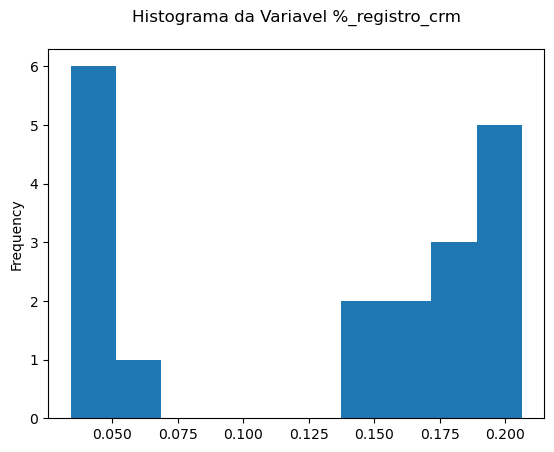

In [ ]:
# Histograma
df_filtrado['%_registro_crm'].plot(kind = "hist")
plt.title("Histograma da Variavel %_registro_crm\n")
plt.show()

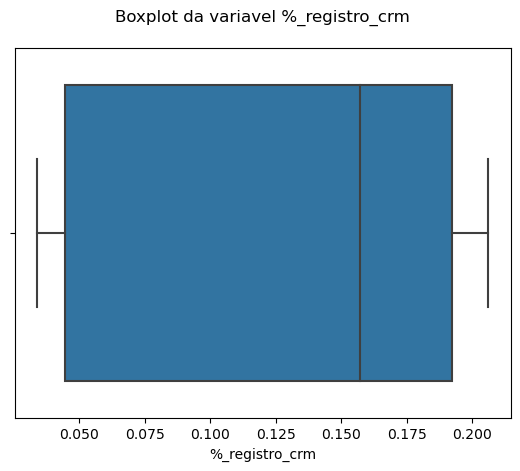

In [ ]:
# Boxplot 
sns.boxplot(df['%_registro_crm'])
plt.title("Boxplot da variavel %_registro_crm\n")
plt.show()

In [ ]:
# Vamos verificar qual é a média
df['%_registro_crm'].mean()

0.12994736842105262

In [ ]:
# Vamos verificar qual é a médiana
df['%_registro_crm'].median()

0.1573

In [ ]:
# Vamos verificar qual é a moda
df['%_registro_crm'].mode()

0     0.0341
1     0.0347
2     0.0351
3     0.0365
4     0.0409
5     0.0480
6     0.0678
7     0.1390
8     0.1520
9     0.1573
10    0.1585
11    0.1803
12    0.1817
13    0.1859
14    0.1985
15    0.2030
16    0.2036
17    0.2059
18    0.2062
dtype: float64

In [ ]:
df_filtrado = df_filtrado.apply(lambda col: col.fillna(col.mean()))

In [ ]:
pd.set_option('display.max_rows', None)  # Configura para exibir todas as linhas
print(df_filtrado)

    Giro de Carteira  %_difer_tx_concessao_coop_x_mercado  \
0            38208.0                             0.004400   
1            38208.0                             0.003400   
2            38208.0                             0.005500   
3            38208.0                             0.003900   
4            38208.0                             0.003700   
5            38208.0                             0.005996   
6            38208.0                             0.004800   
7            38208.0                             0.004200   
8            38208.0                             0.001500   
9            38208.0                             0.002300   
10           38208.0                             0.003800   
11           38208.0                             0.004700   
12           38208.0                             0.006100   
13           38208.0                             0.006900   
14           38208.0                             0.007500   
15           17301.0    

In [ ]:
pd.reset_option('display.max_rows')

In [ ]:
df = df.apply(lambda col: col.fillna(col.mean()))

In [ ]:
df.head()

,NPS_MENSAL,%_difer_tx_concessao_coop_x_mercado,%_cadastro_atual,media_tempo_fila,media_tempo_atendimento,%_vinculacao_boa,%_vinculacao_media,%_vinculacao_baixa,%_vinculacao_baixissima,%_nivel_serv_30_seg,%_auto_atendimento,%_inativo_preinativo,%_coop_ deslig_bacen,media_consumo_cartao,media_limite_credito_x_motor,media_tempo_liberacao_x_esteira_credito,%_utilizacao_cartao,%_motor_x_efetivado_cartao,%_nota_qualid_atendim_recuper_credito,Fraudes Qtde,Fraudes Volume,%_custo_medio_captacao_recurso_ext,%_registro_crm,%_abandono_atend,SLA_atend,TME_atend,%_transferencia_cr_salario,%_cr_aprovado_x_efetivado,%_turnover,nota_app_androide
0,72,0.0044,0.014009,0.1094,0.1806,0.204675,0.202949,0.192561,0.398528,0.793333,0.397295,0.550522,0.0039,1015,1101,1.6152,0.8149,0.6514,0.936548,16,30296,0.0114,0.129947,0.054625,2.31705,0.288421,0.0001,0.8113,0.01751,4.58
1,71,0.0034,0.012973,0.1209,0.1817,0.202389,0.201091,0.192328,0.402705,0.793333,0.397295,0.546671,0.0038,1013,1121,1.8120,0.8138,0.5516,0.962600,5,18375,0.0068,0.129947,0.054625,2.31705,0.288421,0.0001,0.8122,0.01751,4.30
2,72,0.0055,0.013461,0.1168,0.1798,0.198082,0.198985,0.191567,0.410323,0.730000,0.397295,0.545736,0.0037,1032,1272,1.2843,0.8104,0.4309,0.954700,29,137198,0.0078,0.129947,0.126000,3.10920,0.597500,0.0000,0.7626,0.01751,4.16
3,74,0.0039,0.013730,0.1187,0.1835,0.194511,0.197507,0.191253,0.415949,0.610000,0.397295,0.553095,0.0037,1084,1490,1.5340,0.8072,0.4532,0.932600,16,133659,0.0090,0.129947,0.145000,4.54610,0.675300,0.0014,0.7879,0.01751,4.17
4,66,0.0037,0.012547,0.1068,0.1845,0.195088,0.193725,0.189609,0.420977,0.710000,0.397295,0.555057,0.0036,1084,1348,1.6179,0.8148,0.4082,0.939700,77,697710,0.0090,0.129947,0.120000,3.50190,0.564200,0.0000,0.7844,0.01751,4.16


In [ ]:
df.describe()

,NPS_MENSAL,%_difer_tx_concessao_coop_x_mercado,%_cadastro_atual,media_tempo_fila,media_tempo_atendimento,%_vinculacao_boa,%_vinculacao_media,%_vinculacao_baixa,%_vinculacao_baixissima,%_nivel_serv_30_seg,%_auto_atendimento,%_inativo_preinativo,%_coop_ deslig_bacen,media_consumo_cartao,media_limite_credito_x_motor,media_tempo_liberacao_x_esteira_credito,%_utilizacao_cartao,%_motor_x_efetivado_cartao,%_nota_qualid_atendim_recuper_credito,Fraudes Qtde,Fraudes Volume,%_custo_medio_captacao_recurso_ext,%_registro_crm,%_abandono_atend,SLA_atend,TME_atend,%_transferencia_cr_salario,%_cr_aprovado_x_efetivado,%_turnover,nota_app_androide
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.00000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,60.423077,0.005996,0.031283,0.118723,0.197992,0.200599,0.188352,0.189281,0.420365,0.793333,0.397295,0.558835,0.003804,2063.038462,1424.576923,1.86730,0.761219,0.289227,0.936548,80.192308,194516.538462,0.008623,0.129947,0.054625,2.317050,0.288421,0.001800,0.594623,0.017510,3.957692
std,6.543229,0.002096,0.028175,0.008386,0.016467,0.005981,0.010082,0.007577,0.014389,0.098698,0.173190,0.028944,0.000442,528.666812,146.308215,0.26242,0.094036,0.135985,0.022325,130.566770,168441.014102,0.002195,0.060668,0.036048,1.496325,0.249931,0.001363,0.171129,0.002273,0.190543
min,52.000000,0.001500,0.012547,0.106800,0.179800,0.191336,0.170373,0.174615,0.393112,0.580000,0.211600,0.471259,0.003300,1013.000000,1101.000000,1.28430,0.577600,0.119200,0.887900,5.000000,18375.000000,0.004000,0.034100,0.010000,0.601100,0.078900,0.000000,0.420200,0.012400,3.790000
25%,55.250000,0.004250,0.014561,0.112550,0.188625,0.195528,0.181998,0.184194,0.409537,0.722500,0.260250,0.553586,0.003500,2017.250000,1356.750000,1.72055,0.802475,0.188800,0.923250,18.250000,74194.750000,0.007250,0.083337,0.029500,0.777925,0.104550,0.000300,0.450225,0.017400,3.812500
50%,58.500000,0.006500,0.024065,0.116700,0.193600,0.200016,0.188902,0.191207,0.422234,0.820000,0.352000,0.560696,0.003700,2230.000000,1423.000000,1.85245,0.809300,0.251600,0.937924,48.000000,143148.000000,0.008800,0.129947,0.051000,2.317050,0.184050,0.002050,0.464850,0.017510,3.915000
75%,65.250000,0.007700,0.034719,0.126125,0.204500,0.205001,0.197478,0.195179,0.430473,0.870000,0.397295,0.577323,0.004050,2400.000000,1485.750000,2.06585,0.814250,0.361175,0.953800,80.000000,249101.000000,0.009675,0.181350,0.065750,3.709050,0.422550,0.002550,0.787025,0.018675,4.030000
max,74.000000,0.008500,0.140880,0.137400,0.261200,0.213646,0.202949,0.199143,0.442702,0.920000,0.701700,0.594336,0.004700,2519.000000,1820.000000,2.30670,0.822900,0.651400,0.975800,681.000000,697710.000000,0.013500,0.206200,0.145000,4.708300,1.008600,0.005400,0.812200,0.021400,4.580000


In [1]:
df.count()

NameError: name 'df' is not defined

### Identificando e Tratando Outliers

In [ ]:
tratar_outlier = TrataOutlier(df)

In [ ]:
lista_colunas = df.select_dtypes('float64').columns.tolist()

In [ ]:
tratar_outlier.getOverview(lista_colunas)

Nome de Coluna,%_turnover,%_auto_atendimento,%_utilizacao_cartao,%_inativo_preinativo,%_cadastro_atual,%_abandono_atend,nota_app_androide,%_custo_medio_captacao_recurso_ext,media_tempo_atendimento,TME_atend,%_motor_x_efetivado_cartao,%_cr_aprovado_x_efetivado,%_transferencia_cr_salario,SLA_atend,%_registro_crm,%_difer_tx_concessao_coop_x_mercado,%_nota_qualid_atendim_recuper_credito,%_coop_ deslig_bacen,%_nivel_serv_30_seg,%_vinculacao_baixissima,%_vinculacao_baixa,%_vinculacao_media,%_vinculacao_boa,media_tempo_fila,media_tempo_liberacao_x_esteira_credito
Min,0.0124,0.2116,0.5776,0.471259,0.012547,0.01,3.79,0.004,0.1798,0.0789,0.1192,0.4202,0.0,0.6011,0.0341,0.0015,0.8879,0.0033,0.58,0.393112,0.174615,0.170373,0.191336,0.1068,1.2843
Q1,0.0174,0.26025,0.802475,0.553586,0.014561,0.0295,3.8125,0.00725,0.188625,0.10455,0.1888,0.450225,0.0003,0.777925,0.083337,0.00425,0.92325,0.0035,0.7225,0.409537,0.184194,0.181998,0.195528,0.11255,1.72055
Median,0.01751,0.352,0.8093,0.560696,0.024065,0.051,3.915,0.0088,0.1936,0.18405,0.2516,0.46485,0.00205,2.31705,0.129947,0.0065,0.937924,0.0037,0.82,0.422234,0.191207,0.188902,0.200016,0.1167,1.85245
Q3,0.018675,0.397295,0.81425,0.577323,0.034719,0.06575,4.03,0.009675,0.2045,0.42255,0.361175,0.787025,0.00255,3.70905,0.18135,0.0077,0.9538,0.00405,0.87,0.430473,0.195179,0.197478,0.205001,0.126125,2.06585
Max,0.0214,0.7017,0.8229,0.594336,0.14088,0.145,4.58,0.0135,0.2612,1.0086,0.6514,0.8122,0.0054,4.7083,0.2062,0.0085,0.9758,0.0047,0.92,0.442702,0.199143,0.202949,0.213646,0.1374,2.3067
IQR,0.001275,0.137045,0.011775,0.023738,0.020158,0.03625,0.2175,0.002425,0.015875,0.318,0.172375,0.3368,0.00225,2.931125,0.098013,0.00345,0.03055,0.00055,0.1475,0.020936,0.010985,0.01548,0.009472,0.013575,0.3453
Lower fence,0.015487,0.054682,0.784812,0.517979,-0.015677,-0.024875,3.48625,0.003612,0.164812,-0.37245,-0.069762,-0.054975,-0.003075,-3.618762,-0.063683,-0.000925,0.877425,0.002675,0.50125,0.378132,0.167717,0.158778,0.18132,0.092188,1.2026
Upper fence,0.020588,0.602863,0.831913,0.612929,0.064956,0.120125,4.35625,0.013312,0.228313,0.89955,0.619737,1.292225,0.005925,8.105738,0.32837,0.012875,0.999625,0.004875,1.09125,0.461877,0.211656,0.220697,0.219209,0.146487,2.5838
Skew,-0.559927,0.921995,-1.358856,-1.631001,2.850631,1.057876,1.695556,0.154407,2.337312,1.431942,1.013849,0.331344,0.38268,0.281343,-0.469749,-0.530665,-0.430786,0.873999,-0.823632,-0.31225,-0.446797,-0.28008,0.388697,0.523635,-0.405749
Num_Outliers,7,6,6,3,3,2,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
tratar_outlier.replace_outliers_with_fences(lista_colunas)

In [ ]:
tratar_outlier.getOverview(lista_colunas)

Nome de Coluna,%_difer_tx_concessao_coop_x_mercado,%_utilizacao_cartao,%_turnover,%_cr_aprovado_x_efetivado,%_transferencia_cr_salario,TME_atend,SLA_atend,%_abandono_atend,%_registro_crm,%_custo_medio_captacao_recurso_ext,%_nota_qualid_atendim_recuper_credito,%_motor_x_efetivado_cartao,media_tempo_liberacao_x_esteira_credito,%_cadastro_atual,%_coop_ deslig_bacen,%_inativo_preinativo,%_auto_atendimento,%_nivel_serv_30_seg,%_vinculacao_baixissima,%_vinculacao_baixa,%_vinculacao_media,%_vinculacao_boa,media_tempo_atendimento,media_tempo_fila,nota_app_androide
Min,0.0015,0.784812,0.015487,0.4202,0.0,0.0789,0.6011,0.01,0.0341,0.004,0.8879,0.1192,1.2843,0.012547,0.0033,0.517979,0.2116,0.58,0.393112,0.174615,0.170373,0.191336,0.1798,0.1068,3.79
Q1,0.00425,0.802475,0.0174,0.450225,0.0003,0.10455,0.777925,0.0295,0.083337,0.00725,0.92325,0.1888,1.72055,0.014561,0.0035,0.553586,0.26025,0.7225,0.409537,0.184194,0.181998,0.195528,0.188625,0.11255,3.8125
Median,0.0065,0.8093,0.01751,0.46485,0.00205,0.18405,2.31705,0.051,0.129947,0.0088,0.937924,0.2516,1.85245,0.024065,0.0037,0.560696,0.352,0.82,0.422234,0.191207,0.188902,0.200016,0.1936,0.1167,3.915
Q3,0.0077,0.81425,0.018675,0.787025,0.00255,0.42255,3.70905,0.06575,0.18135,0.009675,0.9538,0.361175,2.06585,0.034719,0.00405,0.577323,0.397295,0.87,0.430473,0.195179,0.197478,0.205001,0.2045,0.126125,4.03
Max,0.0085,0.8229,0.020588,0.8122,0.0054,0.89955,4.7083,0.120125,0.2062,0.013312,0.9758,0.619737,2.3067,0.064956,0.0047,0.594336,0.602863,0.92,0.442702,0.199143,0.202949,0.213646,0.228313,0.1374,4.35625
IQR,0.00345,0.011775,0.001275,0.3368,0.00225,0.318,2.931125,0.03625,0.098013,0.002425,0.03055,0.172375,0.3453,0.020158,0.00055,0.023738,0.137045,0.1475,0.020936,0.010985,0.01548,0.009472,0.015875,0.013575,0.2175
Lower fence,-0.000925,0.784812,0.015487,-0.054975,-0.003075,-0.37245,-3.618762,-0.024875,-0.063683,0.003612,0.877425,-0.069762,1.2026,-0.015677,0.002675,0.517979,0.054682,0.50125,0.378132,0.167717,0.158778,0.18132,0.164812,0.092188,3.48625
Upper fence,0.012875,0.831913,0.020588,1.292225,0.005925,0.89955,8.105738,0.120125,0.32837,0.013312,0.999625,0.619737,2.5838,0.064956,0.004875,0.612929,0.602863,1.09125,0.461877,0.211656,0.220697,0.219209,0.228313,0.146487,4.35625
Skew,-0.530665,-0.88336,0.159195,0.331344,0.38268,1.248686,0.281343,0.822177,-0.469749,0.114739,-0.430786,0.90912,-0.405749,1.469389,0.873999,-0.661419,0.70463,-0.823632,-0.31225,-0.446797,-0.28008,0.388697,0.736959,0.523635,1.07376
Num_Outliers,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Teste de Correlação

In [ ]:
corr=df.corr()

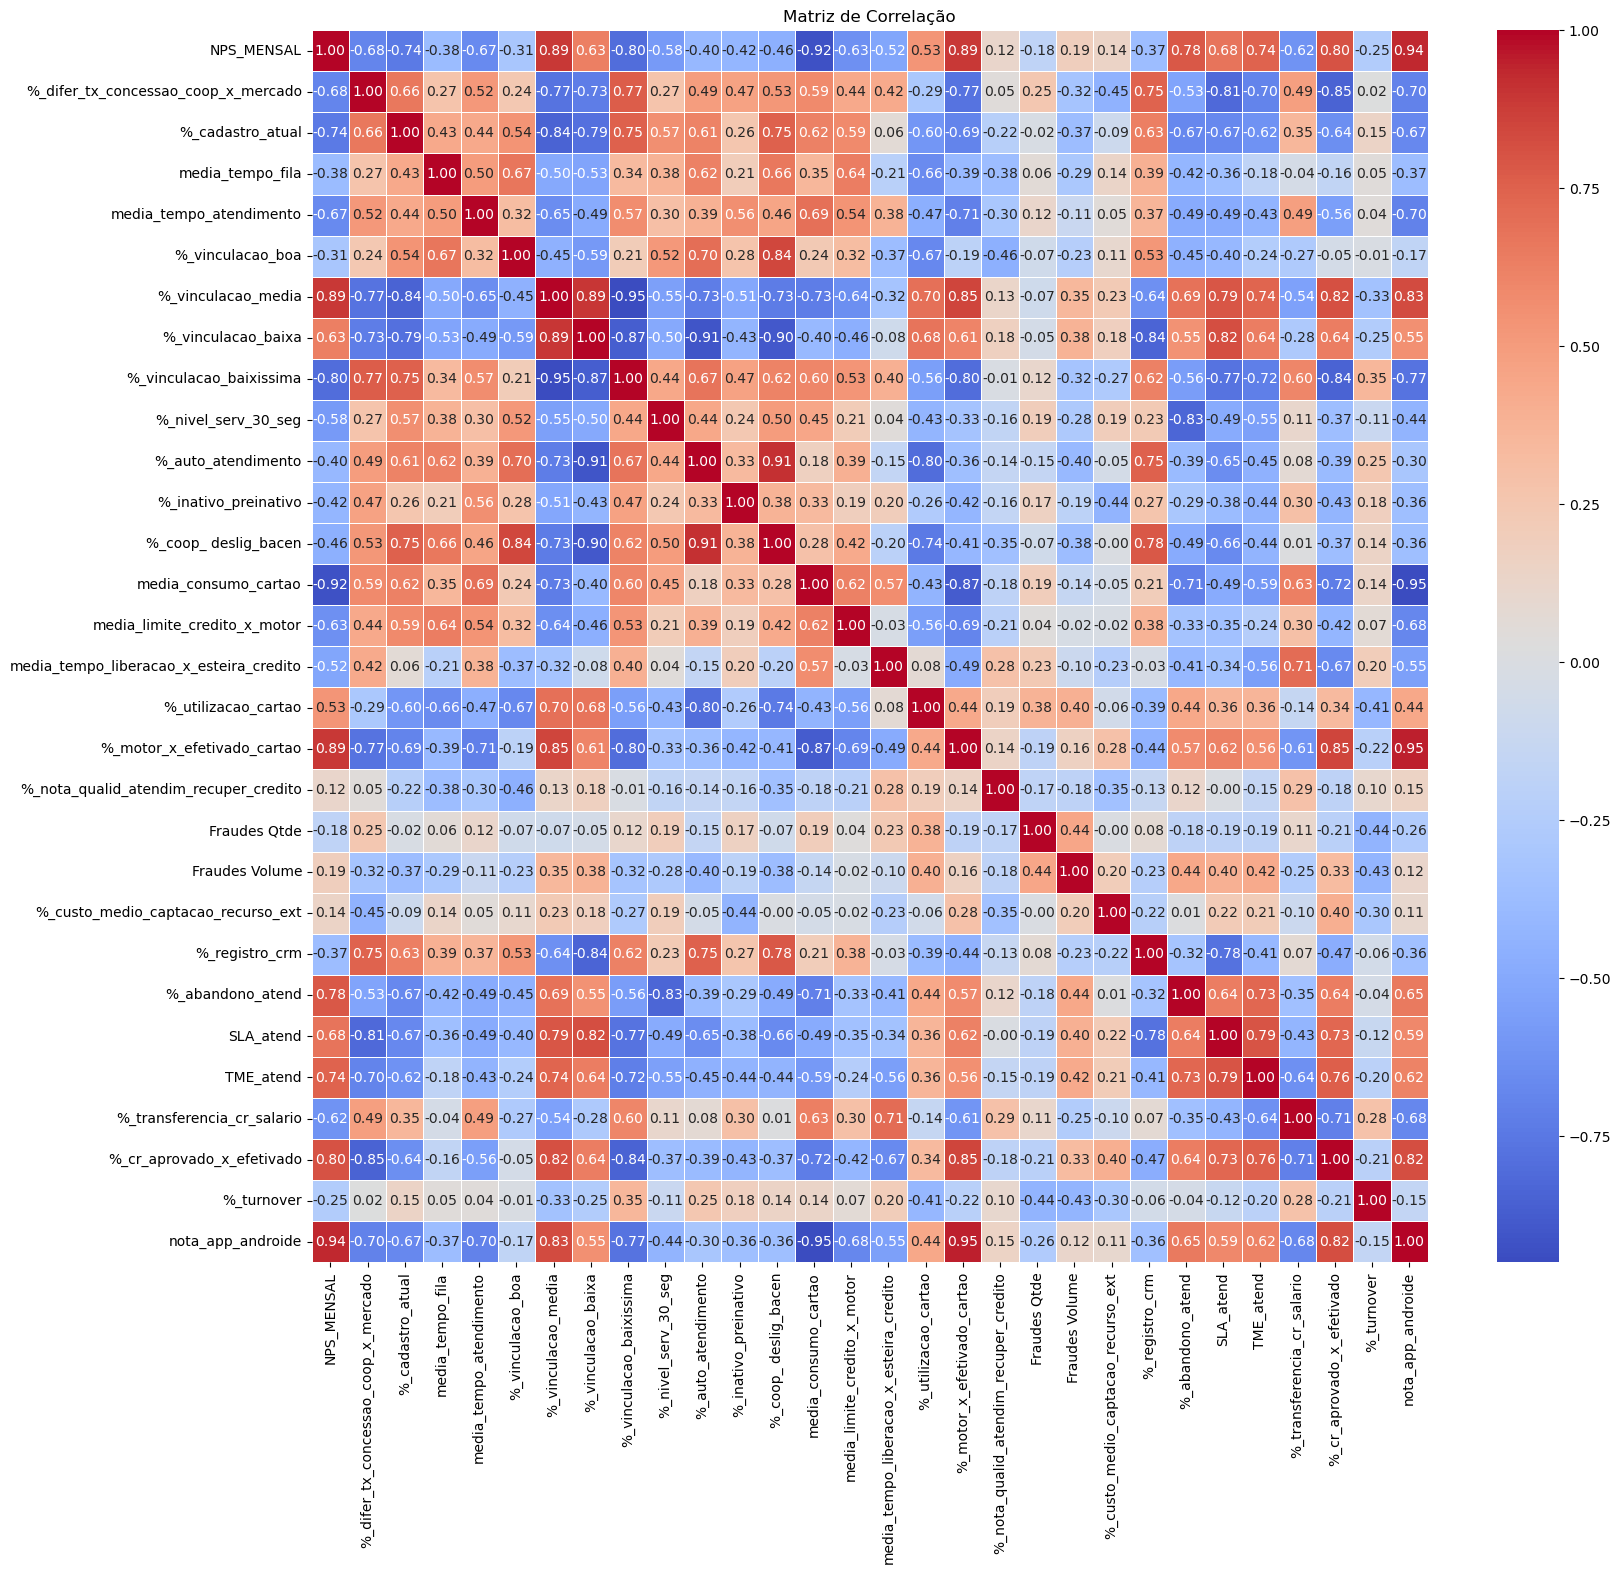

In [ ]:
plt.figure(figsize=(18, 16))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Matriz de Correlação")
plt.rc('font', size=10)
plt.show()


### Teste Correlação Forte

In [ ]:
#Criando nova tabela de correlação
col_selec = ['NPS_MENSAL', '%_motor_x_efetivado_cartao', '%_cr_aprovado_x_efetivado', 'nota_app_androide', '%_vinculacao_media', '%_vinculacao_baixa',  '%_abandono_atend', 'TME_atend', 'SLA_atend', '%_vinculacao_baixissima', '%_cadastro_atual', 'media_consumo_cartao', 'media_tempo_atendimento', 
            '%_difer_tx_concessao_coop_x_mercado']

In [ ]:
forte_correl = df[col_selec]

In [ ]:
forte_correl.head()

,NPS_MENSAL,%_motor_x_efetivado_cartao,%_cr_aprovado_x_efetivado,nota_app_androide,%_vinculacao_media,%_vinculacao_baixa,%_abandono_atend,TME_atend,SLA_atend,%_vinculacao_baixissima,%_cadastro_atual,media_consumo_cartao,media_tempo_atendimento,%_difer_tx_concessao_coop_x_mercado
0,72,0.619737,0.8113,4.35625,0.202949,0.192561,0.054625,0.288421,2.31705,0.398528,0.014009,1015,0.1806,0.0044
1,71,0.551600,0.8122,4.30000,0.201091,0.192328,0.054625,0.288421,2.31705,0.402705,0.012973,1013,0.1817,0.0034
2,72,0.430900,0.7626,4.16000,0.198985,0.191567,0.120125,0.597500,3.10920,0.410323,0.013461,1032,0.1798,0.0055
3,74,0.453200,0.7879,4.17000,0.197507,0.191253,0.120125,0.675300,4.54610,0.415949,0.013730,1084,0.1835,0.0039
4,66,0.408200,0.7844,4.16000,0.193725,0.189609,0.120000,0.564200,3.50190,0.420977,0.012547,1084,0.1845,0.0037


In [ ]:
correl=forte_correl.corr()

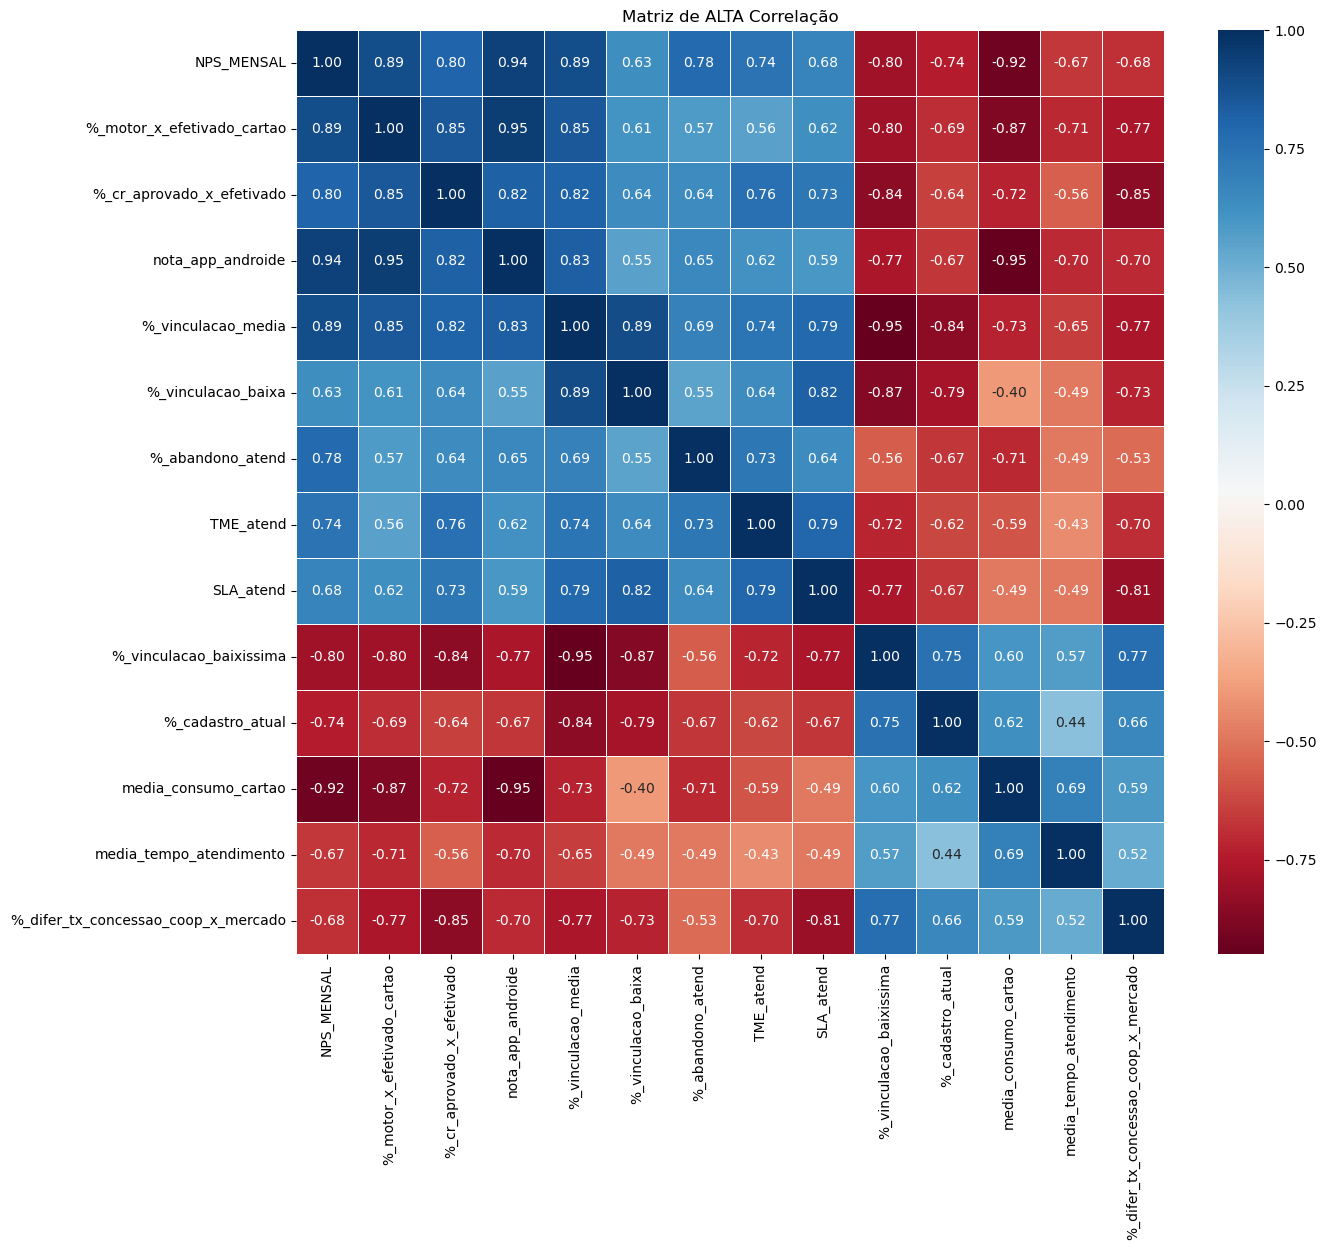

In [ ]:
plt.figure(figsize=(14, 12))
sns.heatmap(correl, annot=True, cmap='RdBu', fmt=".2f", linewidths=.5)
plt.title("Matriz de ALTA Correlação")
plt.rc('font', size=10)
plt.show()


### Teste de Correlação Medio

In [ ]:
#Criando nova tabela de correlação
col_selec_m = ['NPS_MENSAL', '%_utilizacao_cartao','%_auto_atendimento', '%_inativo_preinativo', 'media_tempo_liberacao_x_esteira_credito', '%_coop_ deslig_bacen']

In [ ]:
medio_correl = df[col_selec_m]

In [ ]:
correlm=medio_correl.corr()

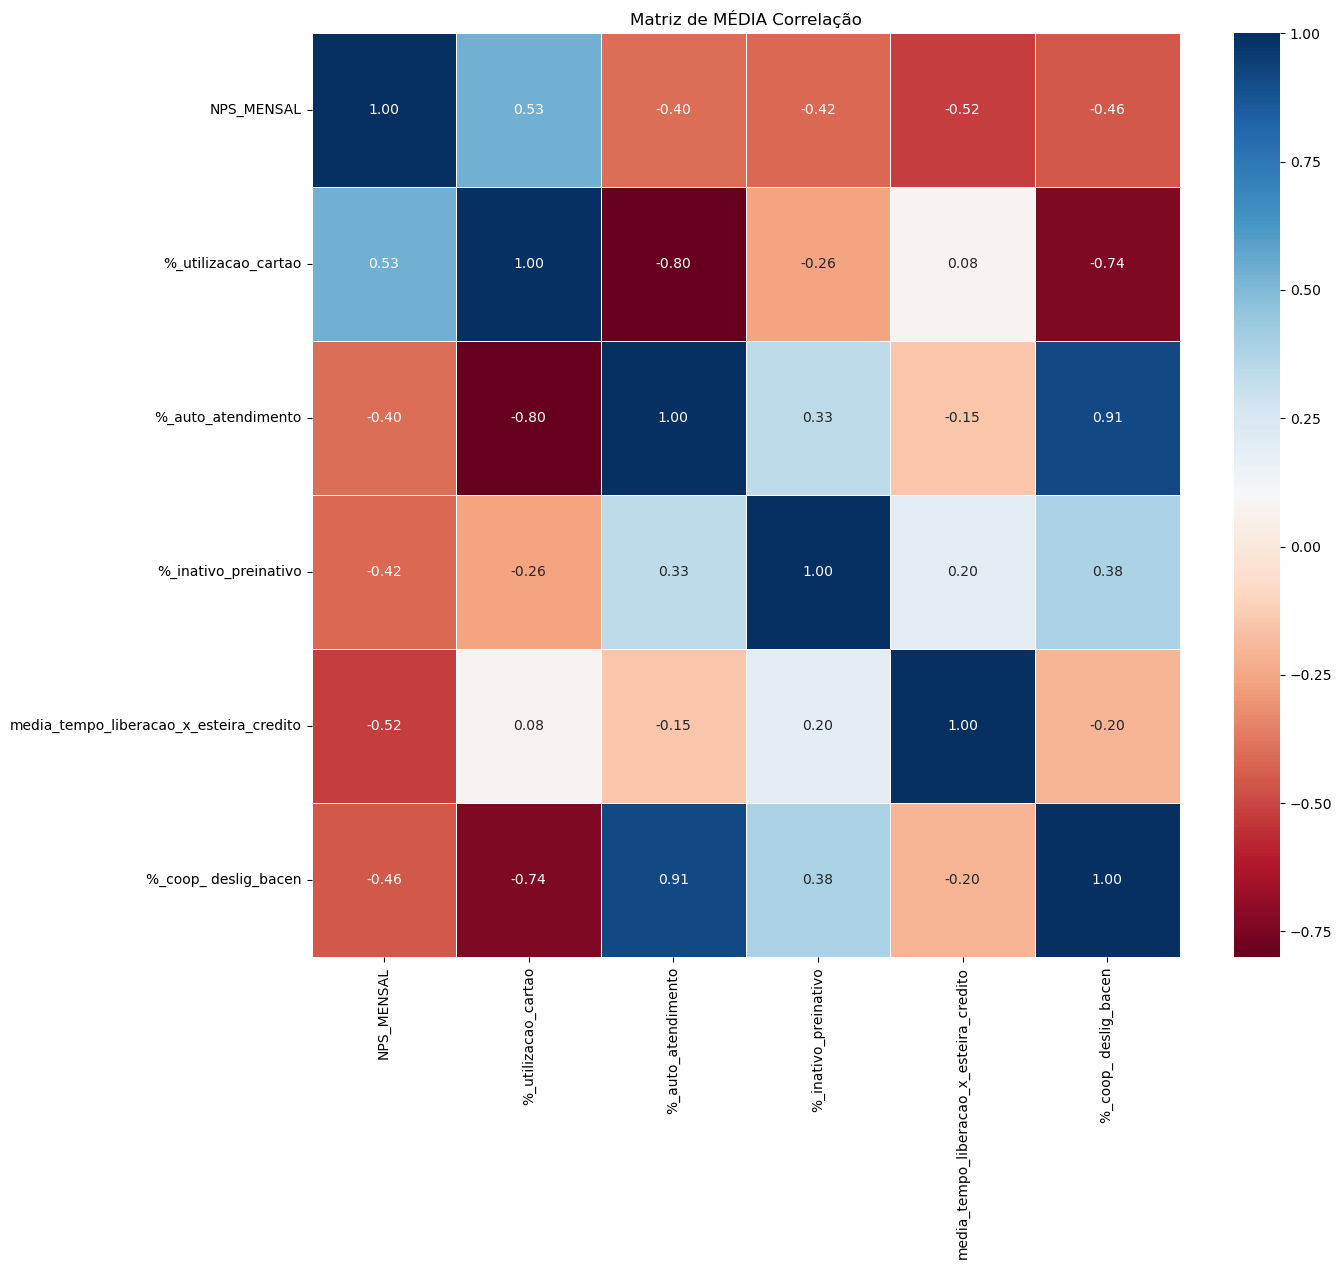

In [ ]:
plt.figure(figsize=(14, 12))
sns.heatmap(correlm, annot=True, cmap='RdBu', fmt=".2f", linewidths=.5)
plt.title("Matriz de MÉDIA Correlação")
plt.rc('font', size=10)
plt.show()

### Regressão Linear Simples dos indicadores com regressão linear positiva ou negativa entre 1,0 e 0,4

In [ ]:
# Função para mostrar resultado na tela.
def run_simple_regressions(df, target, predictors):
    results = {}
    for predictor in predictors:
        #calcula a correlação do indicador preditor com o target
        correlation = df[target].corr(df[predictor])

        #verifica se a correlação está dentro do intervalo especificado
        if 0.4 <= abs(correlation) <= 1.0:
            x = df[[predictor]] # Dataframe dos preditores
            y = df[target] # serie do target
            x = sm.add_constant(x) # Adiciona uma constante ao modelo
            model = sm.OLS(y, x).fit() # ajusta o modelo de regressão

            #Armazena o resumo do modelo na dict de resultados
            results[predictor] = model.summary()
        else:
            print(f'Correlação de {predictor} com {target} fora do intervalo: {correlation: .2f}')
    return results

predictors = ['%_motor_x_efetivado_cartao', '%_cr_aprovado_x_efetivado', 'nota_app_androide', '%_vinculacao_media', '%_vinculacao_baixa',  '%_abandono_atend', 'TME_atend', 'SLA_atend', '%_vinculacao_baixissima', '%_cadastro_atual', 'media_consumo_cartao', 'media_tempo_atendimento', 
            '%_difer_tx_concessao_coop_x_mercado', '%_utilizacao_cartao','%_auto_atendimento', '%_inativo_preinativo', 'media_tempo_liberacao_x_esteira_credito', '%_coop_ deslig_bacen']
results = run_simple_regressions(df, 'NPS_MENSAL', predictors)

# Para visualizar os resultados
for predictor, summary in results.items():
    print(f'Regressão para {predictor}:\n', summary)
           


Regressão para %_motor_x_efetivado_cartao:
                             OLS Regression Results                            
Dep. Variable:             NPS_MENSAL   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     93.08
Date:                Wed, 07 Feb 2024   Prob (F-statistic):           9.86e-10
Time:                        11:07:30   Log-Likelihood:                -64.619
No. Observations:                  26   AIC:                             133.2
Df Residuals:                      24   BIC:                             135.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

In [ ]:
# Função para salvar resultado em arquivo .TXT
def run_simple_regressions_and_save(df, target, predictors, filename='Resultado_regressao_com_Statsmodels.txt'):
    with open(filename, 'w') as file:
        for predictor in predictors:
            #calcula a correlação do indicador preditor com o target
            correlation = df[target].corr(df[predictor])

            #verifica se a correlação está dentro do intervalo especificado
            if 0.4 <= abs(correlation) <= 1.0:
                x = df[[predictor]] # Dataframe dos preditores
                y = df[target] # serie do target
                x = sm.add_constant(x) # Adiciona uma constante ao modelo
                model = sm.OLS(y, x).fit() # ajusta o modelo de regressão

                #Escreva o resumo do modelo no arquivo
                file.write(f'Regressão para {predictor}:\n')
                file.write(model.summary().as_text())
                file.write('\n\n') # Adiciona espaços entre os modelos 
            else:
                file.write(f'Correlação de {predictor} com {target} fora do intervalo: {correlation:.2f}\n\n') 

predictors = ['%_motor_x_efetivado_cartao', '%_cr_aprovado_x_efetivado', 'nota_app_androide', '%_vinculacao_media', '%_vinculacao_baixa',  '%_abandono_atend', 'TME_atend', 'SLA_atend', '%_vinculacao_baixissima', '%_cadastro_atual', 'media_consumo_cartao', 'media_tempo_atendimento', 
            '%_difer_tx_concessao_coop_x_mercado', '%_utilizacao_cartao','%_auto_atendimento', '%_inativo_preinativo', 'media_tempo_liberacao_x_esteira_credito', '%_coop_ deslig_bacen']
run_simple_regressions_and_save(df, 'NPS_MENSAL', predictors, 'Resultado_regressao_com_Statsmodels.txt')

print("Resultados salvos em 'Resultado_regressao_com_Statsmodels.txt'")

Resultados salvos em 'Resultado_regressao_com_Statsmodels.txt'


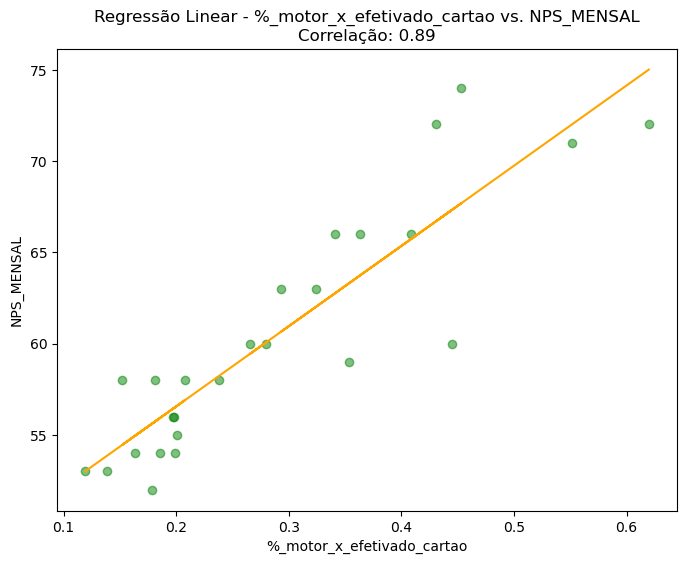

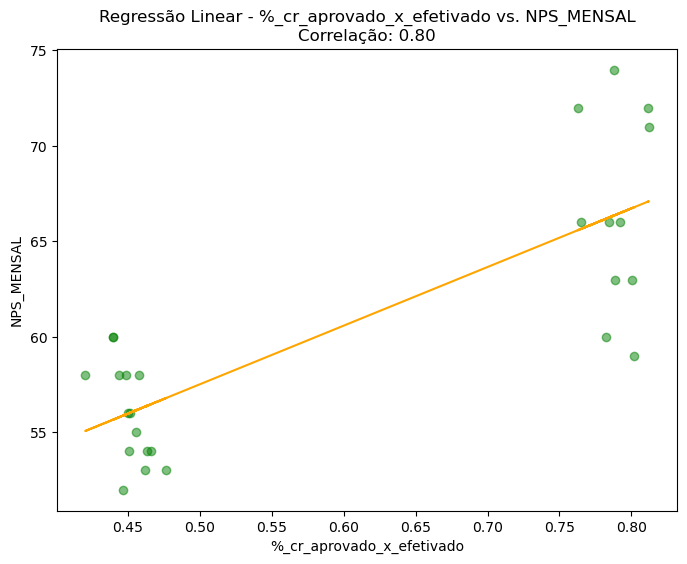

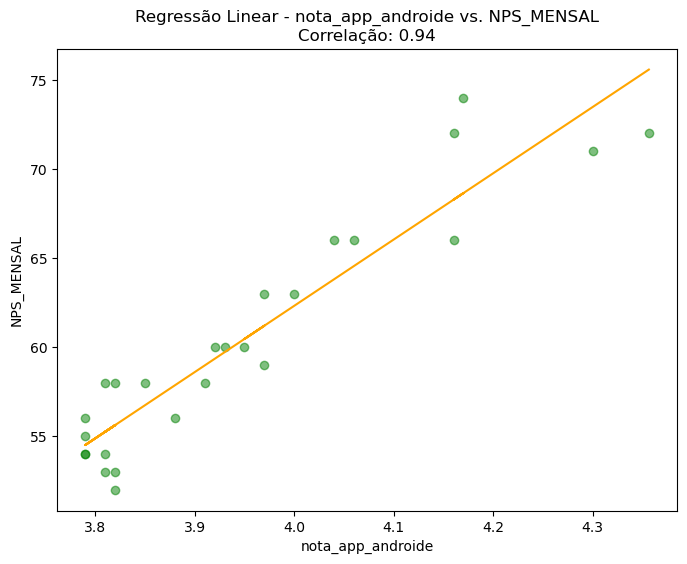

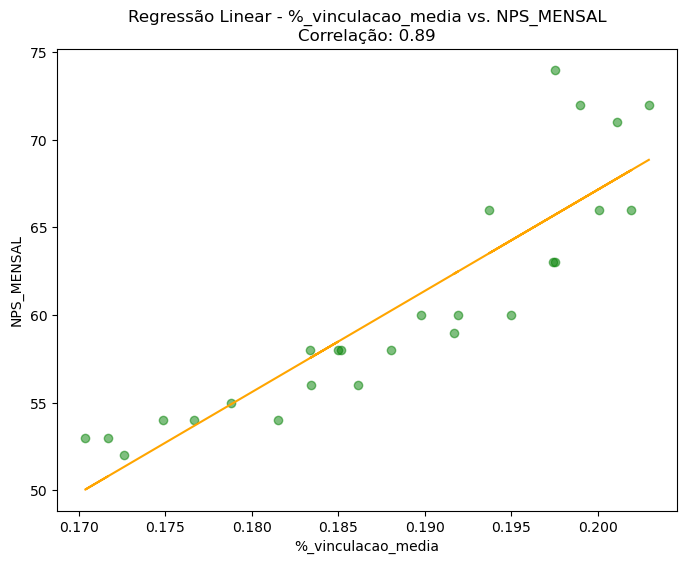

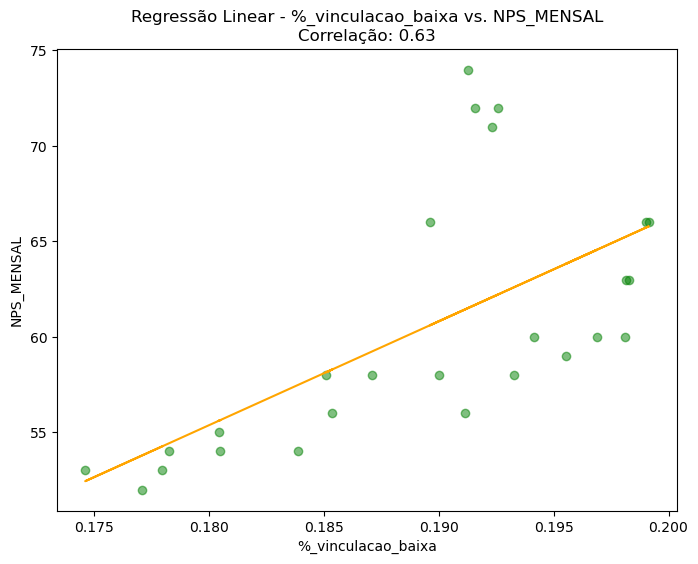

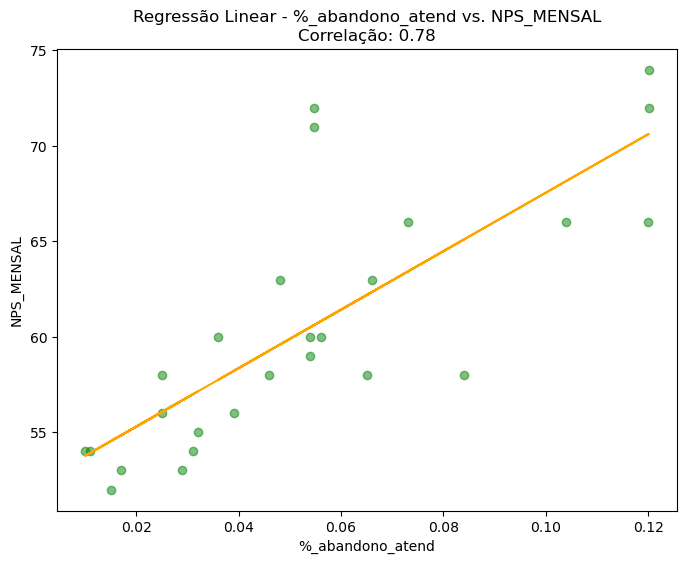

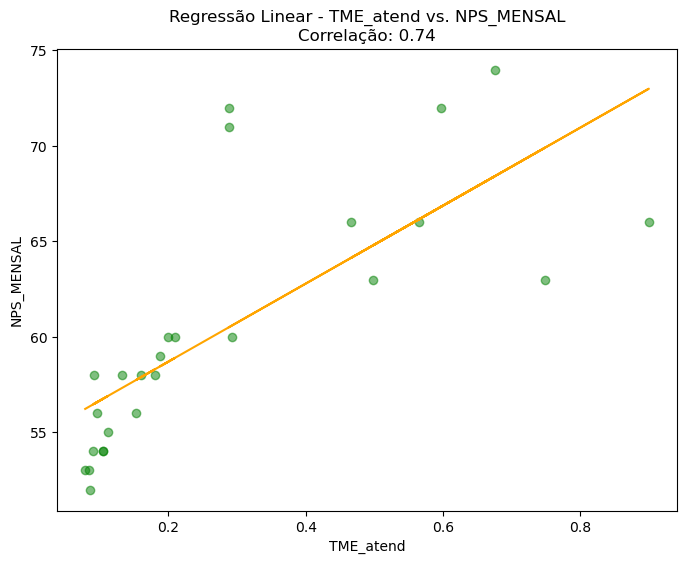

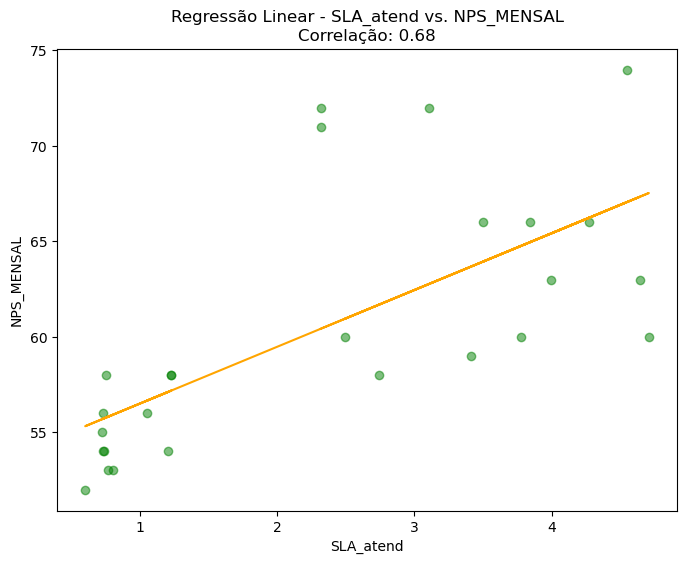

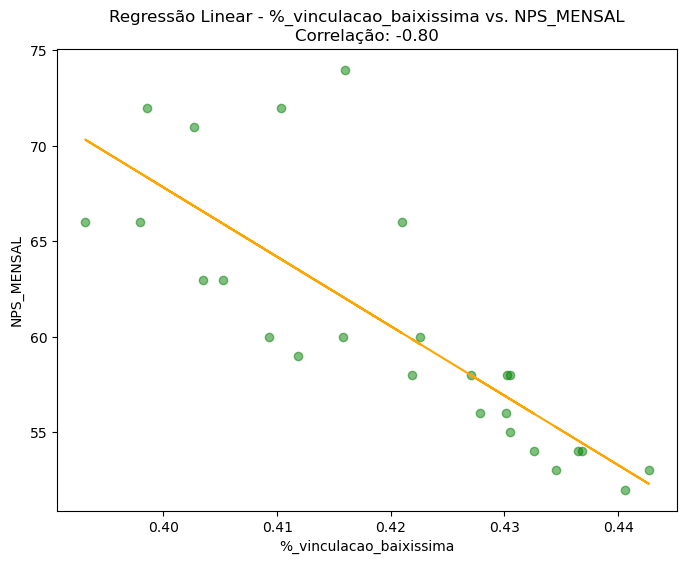

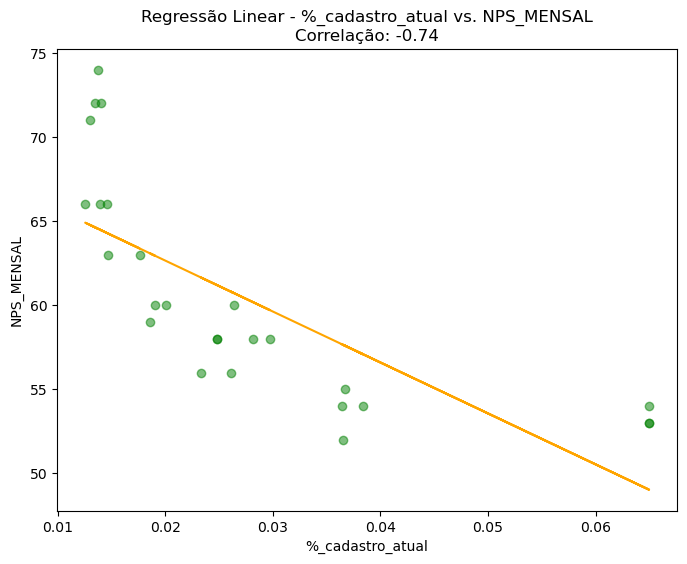

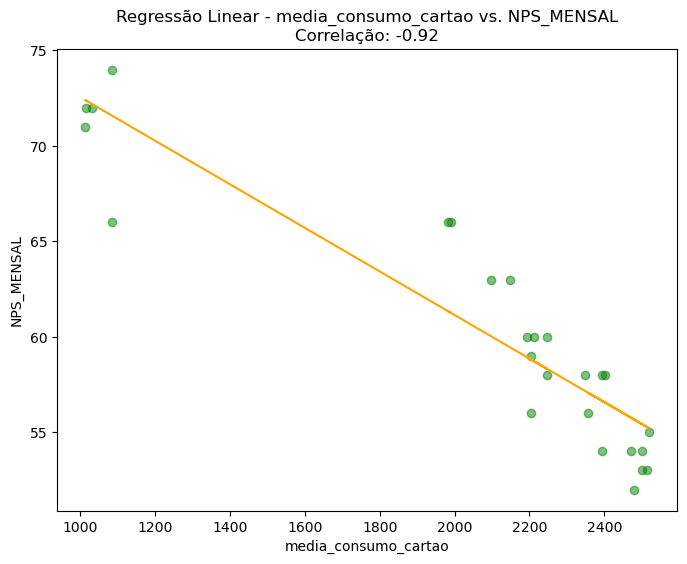

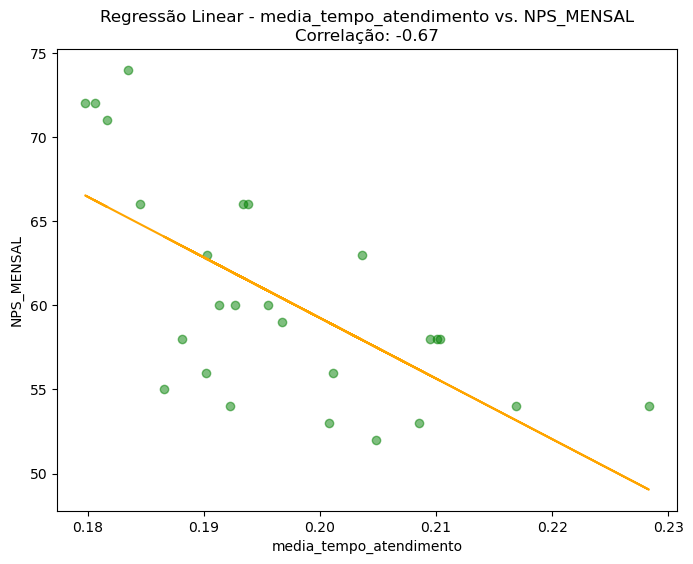

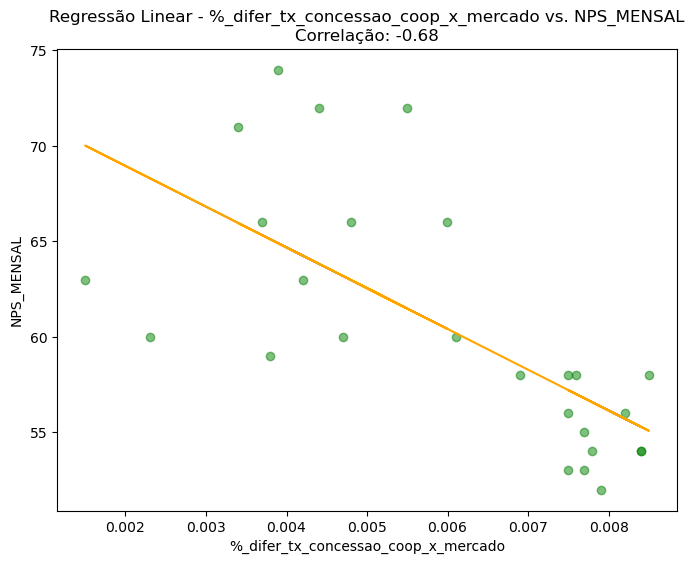

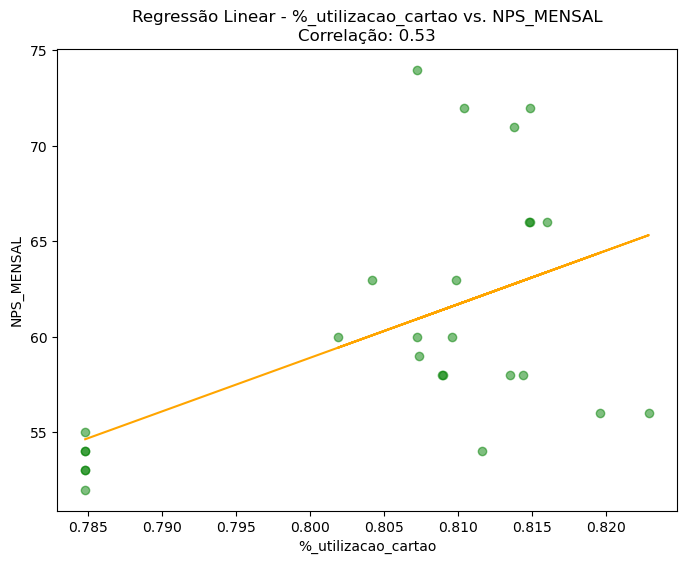

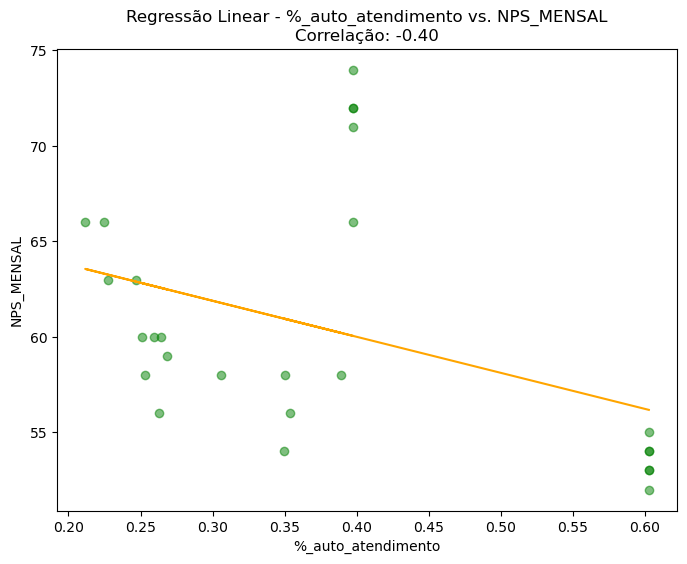

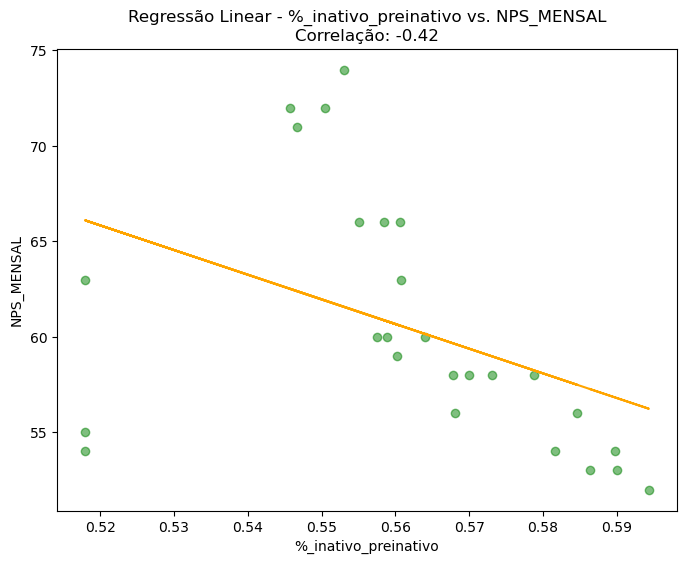

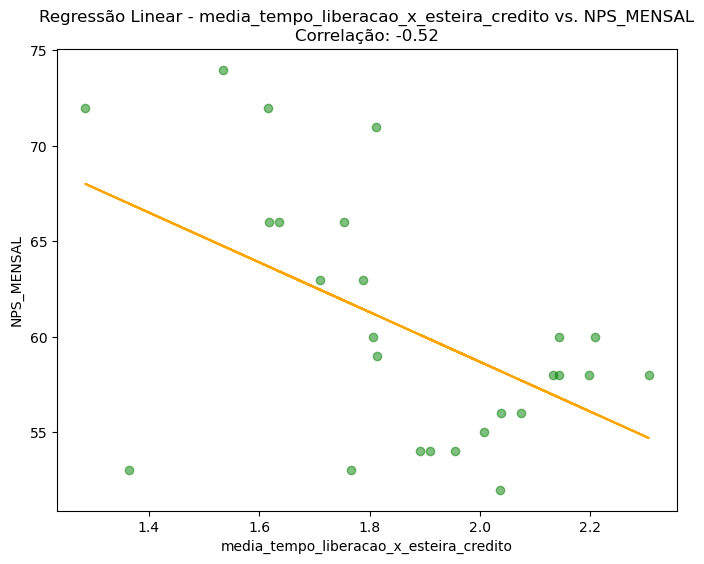

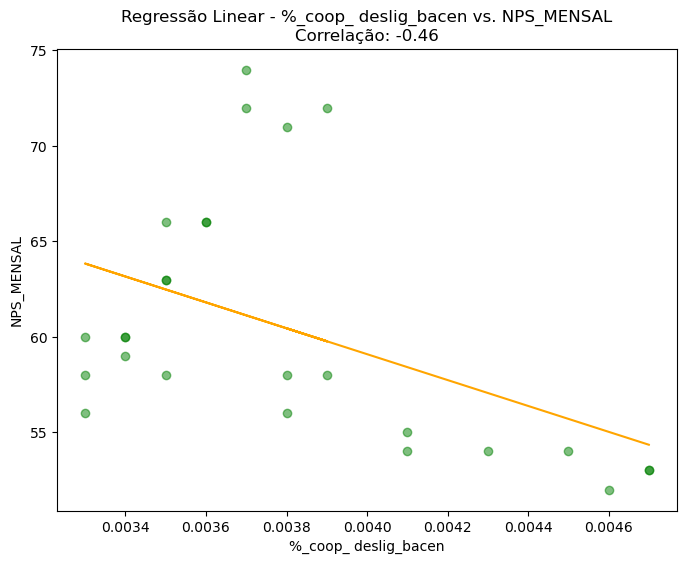

In [ ]:
def run_regressions_and_plot(df, target, predictors):
    for predictor in predictors:
        # Calcula a correlação e filtra conforme o critério
        correlation = df[target].corr(df[predictor])
        if not (0.4 <= abs(correlation) <= 1.0):
            print(f"Correlação de {predictor} com {target} {correlation:.2f}) fora do intervalo [-1.0, -0.4] ou [0.4, 1.0].")
            continue

        #Prepara os dados para regressão
        x = df[predictor]
        y = df[target]
        x = sm.add_constant(x) # adiciona uma constante ao modelo

        # Realiza a regressão
        model = sm.OLS(y, x).fit()

        #Preparação para plotagem
        fig, ax = plt.subplots(figsize=(8, 6))
        ax.scatter(x[predictor], y, alpha=0.5, color='green') #Gráfico de dispersão dos dados
        ax.plot(x[predictor], model.predict(x), color='orange') # Linha de regressão
        
        # Define a cor de fundo do plano de fundo do gráfico
        ax.set_facecolor('white')

        #Configurações do gráfico 
        ax.set_title(f'Regressão Linear - {predictor} vs. {target}\nCorrelação: {correlation:.2f}')
        ax.set_xlabel(predictor)
        ax.set_ylabel(target)
        plt.show()

# Uso da função
predictors = ['%_motor_x_efetivado_cartao', '%_cr_aprovado_x_efetivado', 'nota_app_androide', '%_vinculacao_media', '%_vinculacao_baixa',  '%_abandono_atend', 'TME_atend', 'SLA_atend', '%_vinculacao_baixissima', '%_cadastro_atual', 'media_consumo_cartao', 'media_tempo_atendimento', 
            '%_difer_tx_concessao_coop_x_mercado', '%_utilizacao_cartao','%_auto_atendimento', '%_inativo_preinativo', 'media_tempo_liberacao_x_esteira_credito', '%_coop_ deslig_bacen']
run_regressions_and_plot(df, 'NPS_MENSAL', predictors)   